In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt 

In [22]:
df = pd.read_csv ('games_data.csv')
data = df.to_numpy()
X = data[:100 , [1,2,3,4,5,8,9,10,11,12,13]]
y = data[:100 , 6]

X_val = data[103:129, [1,2,3,4,5,8,9,10,11,12,13]]
y_val = data[103:129, 6]

print(X)

[['A Boy and His Blob' 638.0 2.02 ... 0.0 4.42 11.0]
 ['A Hat in Time' 1992.0 1.53 ... 0.0 4.04 6.0]
 ['A Hero and a Garden' 1364.0 1.01 ... 0.0 0.089 6.0]
 ...
 ['BATMAN – The Telltale Series' 1395.0 1.09 ... 1.0 1.83 8.0]
 ['Batman: Arkham Knight' 4835.0 2.0 ... 1.0 49.46 4.0]
 ['Batman: Arkham VR' 594.0 1.89 ... 1.0 8.58 2.0]]


In [23]:
for i in range(X.shape[0]):
    X[i][0] = len(X[i][0])

for i in range(X_val.shape[0]):
    X_val[i][0] = len(X_val[i][0])

In [24]:
y_encoded = [] #using Neural Networking, categorize the game to success or not. 
for i in range(y.shape[0]):
    if y[i] >= 2.5:
        y_encoded.append(1)
    else:
        y_encoded.append(0)

In [25]:
scaler = StandardScaler()
X= scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [26]:
training_model = LinearSVC(penalty='l1', C = 0.1, dual=False, random_state=0)

In [27]:
training_model.fit(X, y_encoded)

LinearSVC(C=0.1, dual=False, penalty='l1', random_state=0)

In [28]:
y_val_encoded = [] #using Neural Networking, categorize the game to success or not. 
for i in range(y_val.shape[0]):
    if y[i] >= 2.5:
        y_val_encoded.append(1)
    else:
        y_val_encoded.append(0)
print(X_val.shape[0])

26


In [29]:
result = training_model.predict(X_val)
print(result)

[1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1]


In [30]:
sum = 0
for i in range(X_val.shape[0]):
    if result[i] == y_val_encoded[i]:
        sum += 1
accuracy = sum/X_val.shape[0]
print(accuracy)

0.7692307692307693


/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

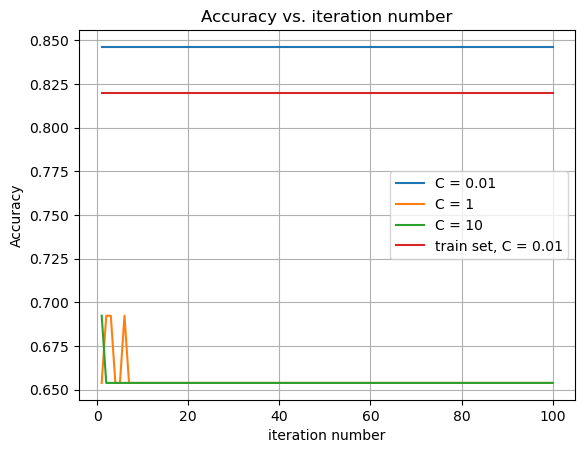

In [38]:
plot_x = []
iteration_array = [1,2,3,4,5,6,7,8,9,10,20, 50, 100]
start_c = 0.001
start_iter = 1
for i in range(5):
    start_c *= 10
    plot_x.append(start_c)
plot_y = []
plot_val_y = []

plot_y_2 = []
plot_val_y_2 = []

plot_y_3 = []
plot_val_y_3 = []

plt.title("Accuracy vs. iteration number") 
plt.ylabel("Accuracy") 
plt.xlabel("iteration number") 

for iteration in iteration_array:
        training_model1 = LinearSVC(C = 0.01,penalty='l1', dual=False, random_state=0, max_iter=iteration)
        training_model2 = LinearSVC(C = 1,penalty='l1',dual=False, random_state=0, max_iter=iteration)
        training_model3 = LinearSVC(C = 10,penalty='l1', dual=False, random_state=0, max_iter=iteration)
        training_model1.fit(X, y_encoded)
        training_model2.fit(X, y_encoded)
        training_model3.fit(X, y_encoded)
        
        
        score1 = training_model1.score(X,y_encoded)
        plot_y.append(score1)
        score1 = training_model1.score(X_val,y_val_encoded)
        plot_val_y.append(score1)
        
        score2 = training_model2.score(X,y_encoded)
        plot_y_2.append(score2)
        score2 = training_model2.score(X_val,y_val_encoded)
        plot_val_y_2.append(score2)
        
        score3 = training_model3.score(X,y_encoded)
        plot_y_3.append(score3)
        score3 = training_model3.score(X_val,y_val_encoded)
        plot_val_y_3.append(score3)
plt.grid()
plt.plot(iteration_array, plot_val_y,label = 'C = 0.01')
plt.plot(iteration_array, plot_val_y_2, label = 'C = 1')
plt.plot(iteration_array, plot_val_y_3, label = 'C = 10')
plt.plot(iteration_array, plot_y, label = 'train set, C = 0.01')
plt.legend()

plt.show()

[0.18, 0.18, 0.18, 0.82, 0.88, 0.87, 0.87, 0.87, 0.87, 0.87]
[0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.8461538461538461, 0.7692307692307693, 0.6538461538461539, 0.6538461538461539, 0.6923076923076923, 0.6923076923076923, 0.6923076923076923]


/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


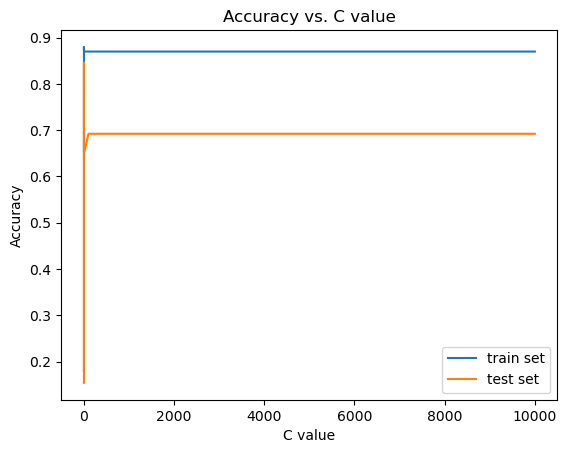

In [45]:
plot_x = [0.0000001, 0.000001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
plot_y = []
plot_val_y = []
plot_y = []
plot_val_y = []

plt.title("Accuracy vs. C value") 
plt.ylabel("Accuracy") 
plt.xlabel("C value") 

for each in plot_x:
    training_model = LinearSVC(penalty='l1', C = each, dual=False, random_state=0)
    training_model.fit(X, y_encoded)
    score = training_model.score(X,y_encoded)
    plot_y.append(score)
    score2 = training_model.score(X_val,y_val_encoded)
    plot_val_y.append(score2)
plt.plot(plot_x, plot_y, label='train set')
plt.plot(plot_x, plot_val_y, label='test set')
plt.legend()

print(plot_y)
print(plot_val_y)

